0. Описать задачу словами
1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор (регрессию) ближайших соседей или другой метод (аргументируйте выбор!)
8. Вычислить ошибки на обучающей и тестовой выборках. Выбрать оптимальное значение гиперпараметра (к-ва ближайших соседей) Сделать выводы


9. По желанию: запустить другие классификаторы. Сравнить результаты
10. По желанию: как-то побороться с несбалансированностью классов (если она есть)
11. По желанию: исключить коррелированные переменные (объяснить зачем)
12. Сделать общие выводы

# Описание задачи

По признакам, перечисленным далее, требуется предсказать возраст человека. Формально поставлена задача восстановления регрессии.

# Чтение данных

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from google.colab import drive


drive.mount('/content/drive')
file_path = '/content/drive/My Drive/StudentPerformanceFactors.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Визуализация данных

In [124]:
entities, features = df.shape
print(f"Entities: {entities}")
print(f"Features: {features}")
print("\n\n")

df.info()

Entities: 6607
Features: 20



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence   

Категориальные признаки:
- Parental_Involvement    
- Access_to_Resources     
- Motivation_Level        
- Family_Income           
- Teacher_Quality         
- Peer_Influence          
- Parental_Education_Level
- Distance_from_Home      

Бинарные признаки
- Extracurricular_Activities
- Internet_Access           
- School_Type               
- Learning_Disabilities     
- Gender                    


Количественные признаки:
- Hours_Studied     
- Attendance        
- Sleep_Hours       
- Previous_Scores   
- Tutoring_Sessions
- Physical_Activity
- Exam_Score        

In [125]:
categorical_features = [
  'Parental_Involvement',
  'Access_to_Resources',
  'Motivation_Level',
  'Family_Income',
  'Teacher_Quality',
  'Peer_Influence',
  'Parental_Education_Level',
  'Distance_from_Home',
  'Extracurricular_Activities',
  'Internet_Access',
  'School_Type',
  'Learning_Disabilities',
  'Gender',
]

numerical_features = [
  'Hours_Studied',
  'Attendance',
  'Sleep_Hours',
  'Previous_Scores',
  'Tutoring_Sessions',
  'Physical_Activity',
  'Exam_Score',
]

In [126]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [127]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [128]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


Присутствуют пропущенные значения это надо обработать


array([[<Axes: xlabel='Hours_Studied', ylabel='Hours_Studied'>,
        <Axes: xlabel='Attendance', ylabel='Hours_Studied'>,
        <Axes: xlabel='Sleep_Hours', ylabel='Hours_Studied'>,
        <Axes: xlabel='Previous_Scores', ylabel='Hours_Studied'>,
        <Axes: xlabel='Tutoring_Sessions', ylabel='Hours_Studied'>,
        <Axes: xlabel='Physical_Activity', ylabel='Hours_Studied'>,
        <Axes: xlabel='Exam_Score', ylabel='Hours_Studied'>],
       [<Axes: xlabel='Hours_Studied', ylabel='Attendance'>,
        <Axes: xlabel='Attendance', ylabel='Attendance'>,
        <Axes: xlabel='Sleep_Hours', ylabel='Attendance'>,
        <Axes: xlabel='Previous_Scores', ylabel='Attendance'>,
        <Axes: xlabel='Tutoring_Sessions', ylabel='Attendance'>,
        <Axes: xlabel='Physical_Activity', ylabel='Attendance'>,
        <Axes: xlabel='Exam_Score', ylabel='Attendance'>],
       [<Axes: xlabel='Hours_Studied', ylabel='Sleep_Hours'>,
        <Axes: xlabel='Attendance', ylabel='Sleep_Hours'>

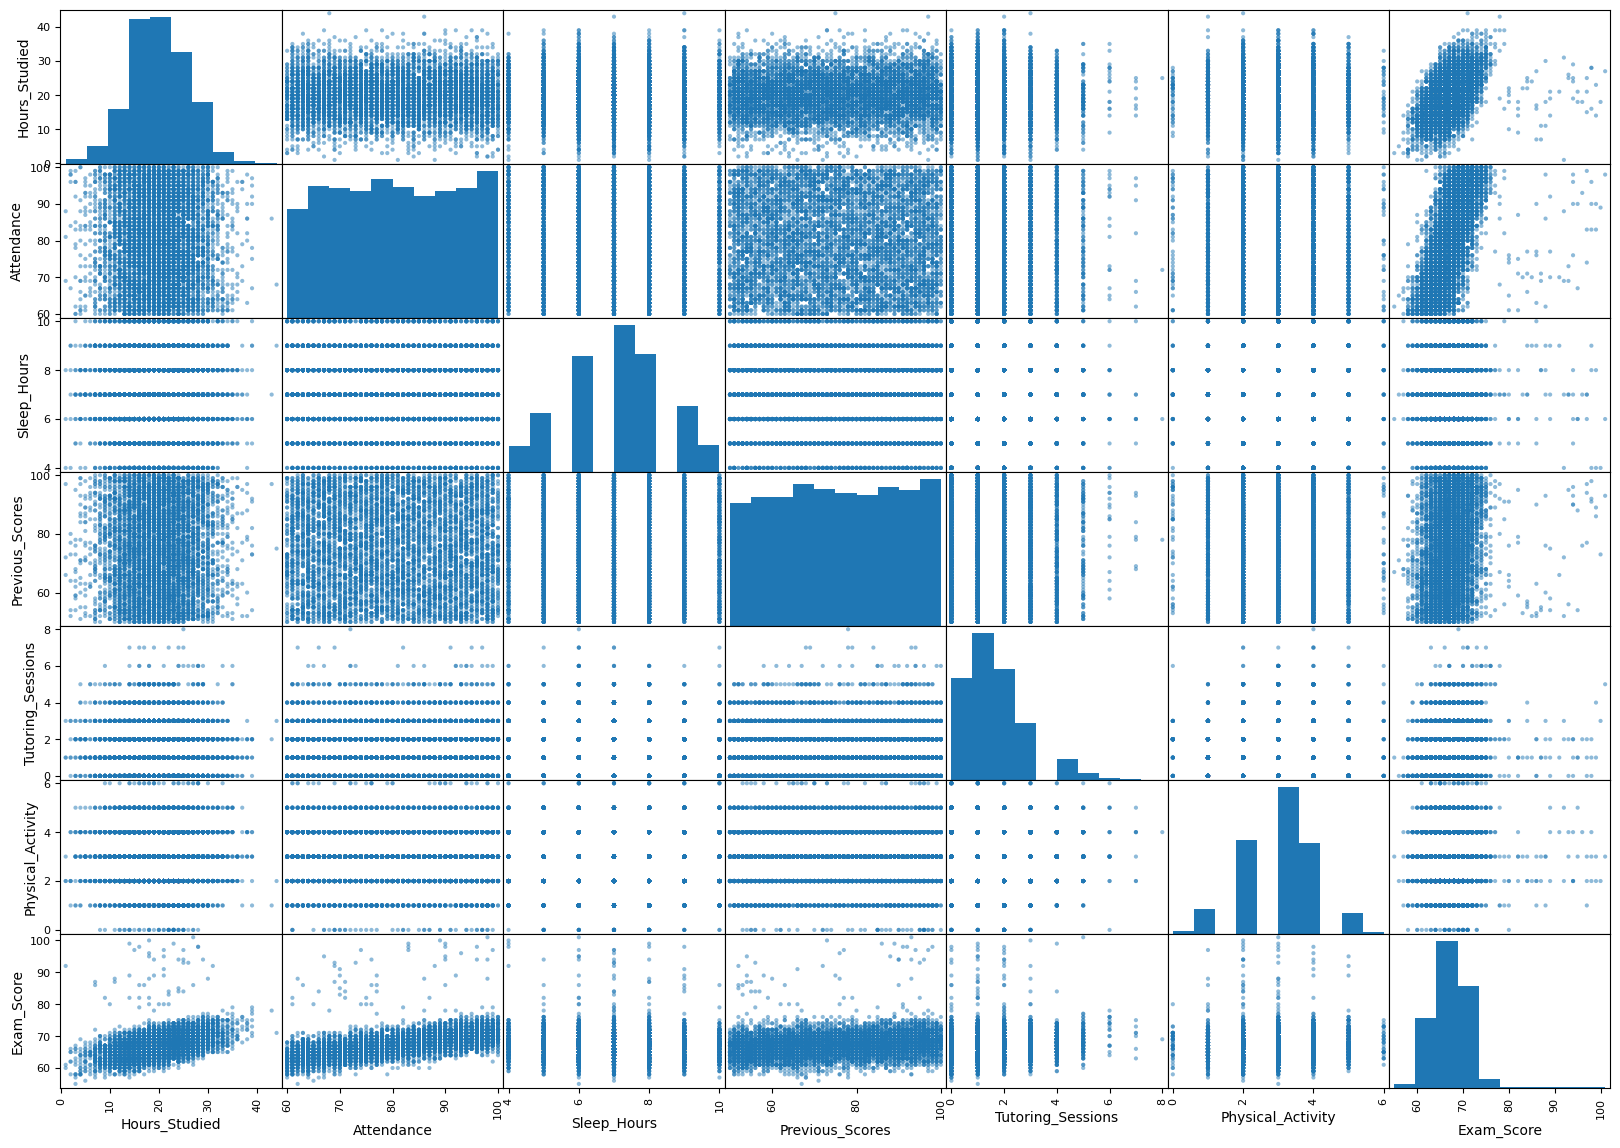

In [129]:
pd.plotting.scatter_matrix(df, figsize = (20, 14))

In [130]:
corr_mat = df.corr(numeric_only=True)
corr_mat

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.009908,0.010977,0.024846,-0.014282,0.004624,0.445455
Attendance,-0.009908,1.000000,-0.015918,-0.020186,0.014324,-0.022435,0.581072
Sleep_Hours,0.010977,-0.015918,1.000000,-0.021750,-0.012216,-0.000378,-0.017022
Previous_Scores,0.024846,-0.020186,-0.021750,1.000000,-0.013122,-0.011274,0.175079
Tutoring_Sessions,-0.014282,0.014324,-0.012216,-0.013122,1.000000,0.017733,0.156525
Physical_Activity,0.004624,-0.022435,-0.000378,-0.011274,0.017733,1.000000,0.027824
Exam_Score,0.445455,0.581072,-0.017022,0.175079,0.156525,0.027824,1.000000


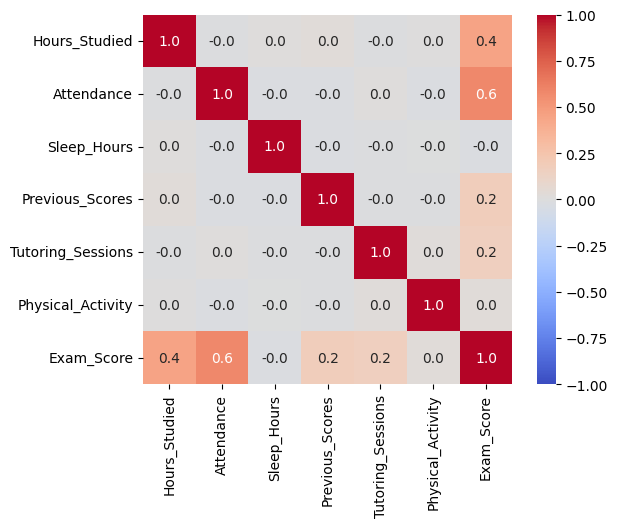

In [131]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.1f', vmin=-1, vmax=1, cmap='coolwarm')
pass

# Обработка пропущенных значений

In [132]:
from sklearn.impute import SimpleImputer

data = df

imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
imp_num.fit(data[numerical_features])
data[numerical_features] = imp_num.transform(data[numerical_features])

imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(data[categorical_features])
data[categorical_features] = imp_cat.transform(data[categorical_features])

In [133]:
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


# Обработка категориальных признаков

Все категориальные признаки должны быть преобразованы в числовые (векторные) представления, чтобы в дальнейшем их можно было скорить в некоторую модель.

In [134]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit(data[categorical_features])


temp = pd.DataFrame(enc.transform(data[categorical_features]),
                       columns=categorical_features,
                       index=data.index)
data = data.drop(categorical_features, axis=1)
data = pd.concat((data, temp), axis = 1)

temp.head()

,Parental_Involvement,Access_to_Resources,Motivation_Level,Family_Income,Teacher_Quality,Peer_Influence,Parental_Education_Level,Distance_from_Home,Extracurricular_Activities,Internet_Access,School_Type,Learning_Disabilities,Gender
0,1.0,0.0,1.0,1.0,2.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0
1,1.0,2.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0
3,1.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
4,2.0,2.0,2.0,2.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0


# Нормализация данных

In [135]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = data.columns.difference(['Exam_Score'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[columns_to_normalize])
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_normalize, index=data.index)
norm_data = pd.concat([scaled_df, data[['Exam_Score']]], axis=1)

norm_data.describe()

,Access_to_Resources,Attendance,Distance_from_Home,Extracurricular_Activities,Family_Income,Gender,Hours_Studied,Internet_Access,Learning_Disabilities,Motivation_Level,Parental_Education_Level,Parental_Involvement,Peer_Influence,Physical_Activity,Previous_Scores,School_Type,Sleep_Hours,Teacher_Quality,Tutoring_Sessions,Exam_Score
count,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6.607000e+03,6607.000000
mean,-2.688598e-18,-3.089199e-16,5.162109e-17,1.312036e-16,-4.194213e-17,8.065795e-18,-1.161474e-16,-8.818602e-17,-1.989563e-17,-2.054089e-16,8.146453e-17,2.823028e-17,-8.280882e-17,-1.720703e-17,2.048712e-16,1.226001e-16,-2.016449e-16,9.463866e-17,7.850707e-17,67.235659
std,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,1.000076e+00,3.890456
min,-1.380517e+00,-1.730158e+00,-2.235736e+00,-1.214685e+00,-1.632214e+00,-1.168570e+00,-3.167760e+00,-3.498640e+00,-3.428666e-01,-1.671088e+00,-1.283503e+00,-1.409559e+00,-1.575587e+00,-2.877953e+00,-1.741167e+00,-1.512845e+00,-2.063380e+00,-1.462550e+00,-1.213934e+00,55.000000
25%,-1.380517e+00,-8.641026e-01,-7.436647e-01,-1.214685e+00,-2.848830e-01,-1.168570e+00,-6.636453e-01,2.858254e-01,-3.428666e-01,-3.930605e-01,-1.283503e+00,-1.409559e+00,-2.525185e-01,-9.383768e-01,-8.383073e-01,-1.512845e+00,-7.009903e-01,-1.462550e+00,-4.012417e-01,65.000000
50%,9.138045e-01,1.953115e-03,7.484071e-01,8.232589e-01,-2.848830e-01,8.557465e-01,4.118568e-03,2.858254e-01,-3.428666e-01,8.849665e-01,1.482215e-01,9.010618e-01,-2.525185e-01,3.141133e-02,-4.898448e-03,6.610061e-01,-1.979558e-02,7.683323e-01,-4.012417e-01,67.000000
75%,9.138045e-01,8.680088e-01,7.484071e-01,8.232589e-01,1.062448e+00,8.557465e-01,6.718825e-01,2.858254e-01,-3.428666e-01,8.849665e-01,1.482215e-01,9.010618e-01,1.070550e+00,1.001199e+00,8.979612e-01,6.610061e-01,6.613991e-01,7.683323e-01,4.114511e-01,69.000000
max,9.138045e-01,1.734065e+00,7.484071e-01,8.232589e-01,1.062448e+00,8.557465e-01,4.010702e+00,2.858254e-01,2.916586e+00,8.849665e-01,1.579946e+00,9.010618e-01,1.070550e+00,2.940776e+00,1.731370e+00,6.610061e-01,2.023788e+00,7.683323e-01,5.287608e+00,101.000000


# Создание тестовой и обучающей выборки

In [136]:
x = norm_data.drop(['Exam_Score'], axis=1)
y = norm_data['Exam_Score']

x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size = 0.3, random_state = 42)

N_train, _ = x_train.shape
N_test,  _ = x_test.shape

print(f"Размер тренировочной выборки: {N_train}",
      f"Размер тестовой выборки: {N_test}", sep='\n')

Размер тренировочной выборки: 4624
Размер тестовой выборки: 1983


# Модели

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Линейная регрессия

In [138]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_pred_linear = linear_model.predict(x_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Линейная регрессия:")
print(f"Среднеквадратичная ошибка (MSE): {mse_linear}")
print(f"Средняя абсолютная ошибка (MAE): {mae_linear}")
print(f"Коэффициент детерминации (R²): {r2_linear}")

Линейная регрессия:
Среднеквадратичная ошибка (MSE): 4.2766944625470655
Средняя абсолютная ошибка (MAE): 1.019342020229934
Коэффициент детерминации (R²): 0.6887406553164541


In [139]:
linear_model_coefs = list(linear_model.coef_)
linear_feature_coef = {feat : coef for feat, coef in
                       zip(x_train.columns, linear_model_coefs)}

linear_feature_coef = dict(sorted(linear_feature_coef.items(),
                                  key=lambda item: abs(item[1]),
                                  reverse=True))
linear_feature_coef

{'Attendance': 2.298792858071689,
 'Hours_Studied': 1.7239746140861363,
 'Previous_Scores': 0.7045171719218343,
 'Tutoring_Sessions': 0.6209137807909796,
 'Peer_Influence': 0.40837957173042183,
 'Parental_Involvement': -0.3951148703432451,
 'Access_to_Resources': -0.36923119869621107,
 'Distance_from_Home': 0.33079444046899553,
 'Extracurricular_Activities': 0.2849559761747782,
 'Internet_Access': 0.2849133186321304,
 'Learning_Disabilities': -0.2649502770501123,
 'Teacher_Quality': -0.21101803372531258,
 'Physical_Activity': 0.1613312480515512,
 'Parental_Education_Level': 0.12699682145860014,
 'Motivation_Level': -0.1268073719317882,
 'Family_Income': -0.10307174436593813,
 'Sleep_Hours': -0.053481542539698355,
 'School_Type': -0.014248520399659619,
 'Gender': -0.008194735413317614}

## kNN

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


param_grid = {'n_neighbors': range(1, 31)}
knn = KNeighborsRegressor()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)


best_n_neighbors = grid_search.best_params_['n_neighbors']
best_score = -grid_search.best_score_

print(f"Лучший параметр n_neighbors: {best_n_neighbors}")
print(f"Среднеквадратичная ошибка (MSE) при лучшем n_neighbors: {best_score}")

Лучший параметр n_neighbors: 19
Среднеквадратичная ошибка (MSE) при лучшем n_neighbors: 8.581075527950874


In [141]:
knn_model = KNeighborsRegressor(n_neighbors=19)
knn_model.fit(x_train, y_train)

y_pred_knn = knn_model.predict(x_test)

mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("\nk-ближайшие соседи:")
print(f"Среднеквадратичная ошибка (MSE): {mse_knn}")
print(f"Средняя абсолютная ошибка (MAE): {mae_knn}")
print(f"Коэффициент детерминации (R²): {r2_knn}")


k-ближайшие соседи:
Среднеквадратичная ошибка (MSE): 6.742689592841088
Средняя абсолютная ошибка (MAE): 1.6737532181436952
Коэффициент детерминации (R²): 0.5092646523029034


# Выводы
Линейная регрессия показывает себя лучше, чем метод kNN. Это объясняется достаточно простой зависимостью между результами экзаменов, и параметрами посещаемости/трудозатрат.

# Кластеризация

## Подготовка данных

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from google.colab import drive
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler


drive.mount('/content/drive')
file_path = '/content/drive/My Drive/StudentPerformanceFactors.csv'
df = pd.read_csv(file_path)

categorical_features = [
  'Parental_Involvement',
  'Access_to_Resources',
  'Motivation_Level',
  'Family_Income',
  'Teacher_Quality',
  'Peer_Influence',
  'Parental_Education_Level',
  'Distance_from_Home',
  'Extracurricular_Activities',
  'Internet_Access',
  'School_Type',
  'Learning_Disabilities',
  'Gender',
]

numerical_features = [
  'Hours_Studied',
  'Attendance',
  'Sleep_Hours',
  'Previous_Scores',
  'Tutoring_Sessions',
  'Physical_Activity',
  'Exam_Score',
]

data = df

imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
imp_num.fit(data[numerical_features])
data[numerical_features] = imp_num.transform(data[numerical_features])

imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_cat.fit(data[categorical_features])
data[categorical_features] = imp_cat.transform(data[categorical_features])


enc = OrdinalEncoder()
enc.fit(data[categorical_features])


temp = pd.DataFrame(enc.transform(data[categorical_features]),
                       columns=categorical_features,
                       index=data.index)
data = data.drop(categorical_features, axis=1)
data = pd.concat((data, temp), axis = 1)

temp.head()


columns_to_normalize = data.columns.difference(['Exam_Score'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[columns_to_normalize])
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_normalize, index=data.index)
norm_data = pd.concat([scaled_df, data[['Exam_Score']]], axis=1)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Наивный подход

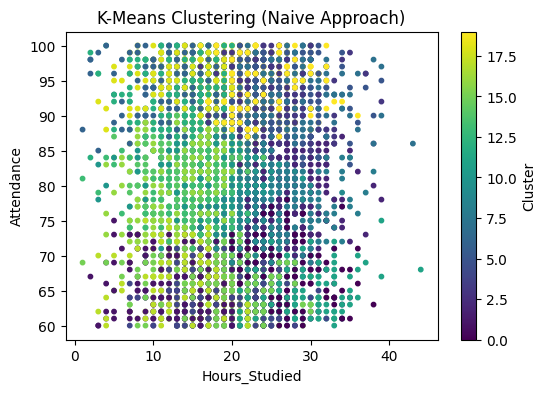

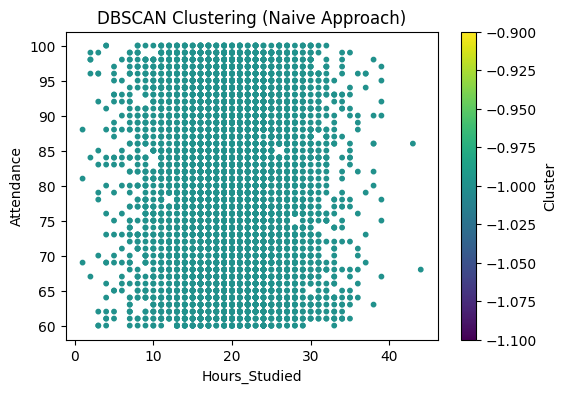

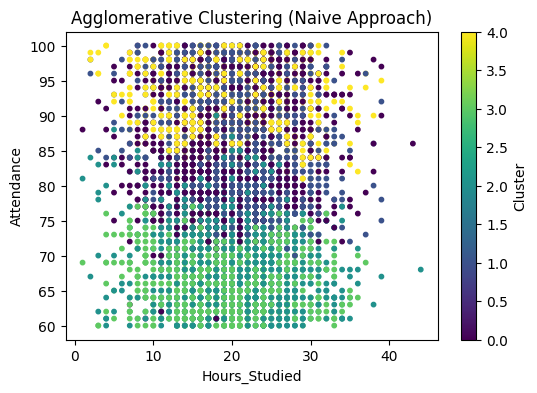

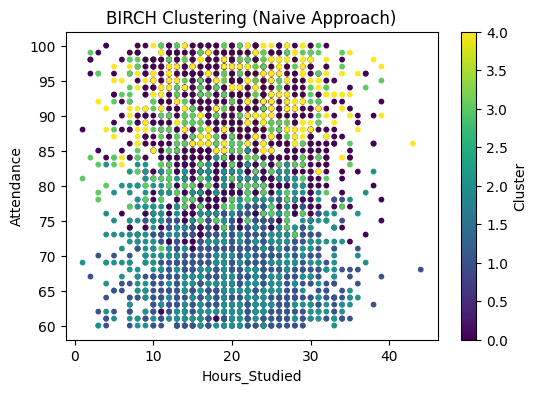

K-Means (Naive Approach):
  Silhouette Score: 0.19
  Adjusted Rand Index: 0.05
DBSCAN (Naive Approach):
  Silhouette Score: nan
  Adjusted Rand Index: 0.00
Agglomerative (Naive Approach):
  Silhouette Score: 0.22
  Adjusted Rand Index: 0.04
BIRCH (Naive Approach):
  Silhouette Score: 0.23
  Adjusted Rand Index: 0.04


In [143]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt


naive_results = {}
algorithms = {
    "K-Means": KMeans(n_clusters=20, random_state=42),
    "DBSCAN": DBSCAN(eps=1.5, min_samples=5),
    "Agglomerative": AgglomerativeClustering(n_clusters=5),
    "BIRCH": Birch(n_clusters=5, threshold=0.5),
}

for name, model in algorithms.items():
    labels = model.fit_predict(data)
    silhouette = silhouette_score(data, labels) if len(np.unique(labels)) > 1 else np.nan
    ari = adjusted_rand_score(data["Exam_Score"], labels)
    naive_results[name] = {"Silhouette Score": silhouette, "Adjusted Rand Index": ari}

    plt.figure(figsize=(6, 4))
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap="viridis", s=10)
    plt.title(f"{name} Clustering (Naive Approach)")
    plt.colorbar(label="Cluster")
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.show()

for method, scores in naive_results.items():
    print(f"{method} (Naive Approach):")
    for metric, value in scores.items():
        print(f"  {metric}: {value:.2f}")


## Нормализация

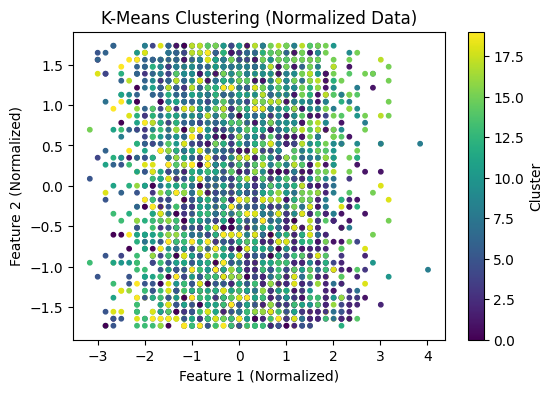

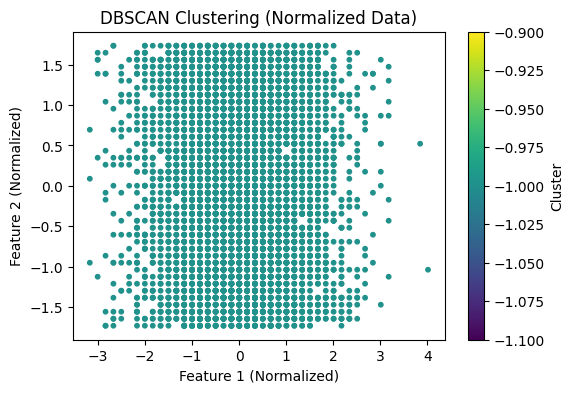

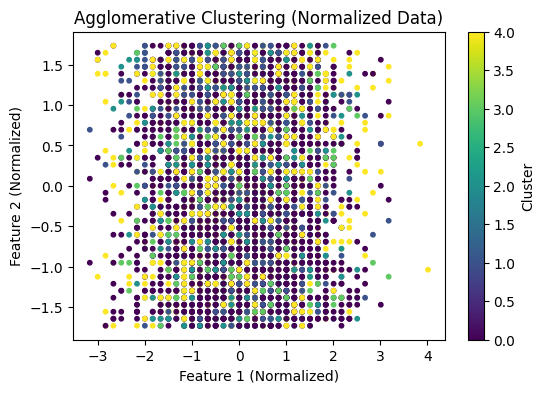

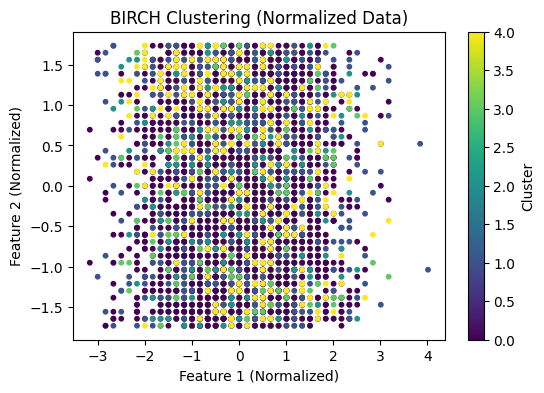

K-Means (Normalized Data):
  Silhouette Score: 0.04
  Adjusted Rand Index: 0.03
DBSCAN (Normalized Data):
  Silhouette Score: nan
  Adjusted Rand Index: 0.00
Agglomerative (Normalized Data):
  Silhouette Score: 0.04
  Adjusted Rand Index: 0.00
BIRCH (Normalized Data):
  Silhouette Score: 0.04
  Adjusted Rand Index: 0.00


In [144]:
scaler = StandardScaler()
data_normalized_only = scaler.fit_transform(data)
normalized_results = {}

for name, model in algorithms.items():
    labels = model.fit_predict(data_normalized_only)
    silhouette = silhouette_score(data_normalized_only, labels) if len(np.unique(labels)) > 1 else np.nan
    ari = adjusted_rand_score(data["Exam_Score"], labels)
    normalized_results[name] = {"Silhouette Score": silhouette, "Adjusted Rand Index": ari}

    plt.figure(figsize=(6, 4))
    plt.scatter(data_normalized_only[:, 0], data_normalized_only[:, 1], c=labels, cmap="viridis", s=10)
    plt.title(f"{name} Clustering (Normalized Data)")
    plt.colorbar(label="Cluster")
    plt.xlabel("Feature 1 (Normalized)")
    plt.ylabel("Feature 2 (Normalized)")
    plt.show()

for method, scores in normalized_results.items():
    print(f"{method} (Normalized Data):")
    for metric, value in scores.items():
        print(f"  {metric}: {value:.2f}")

## Понижение размерности

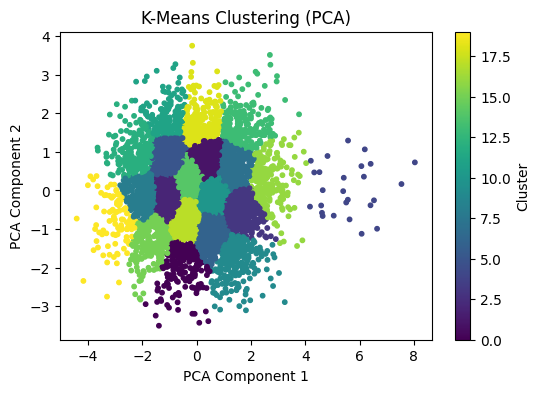

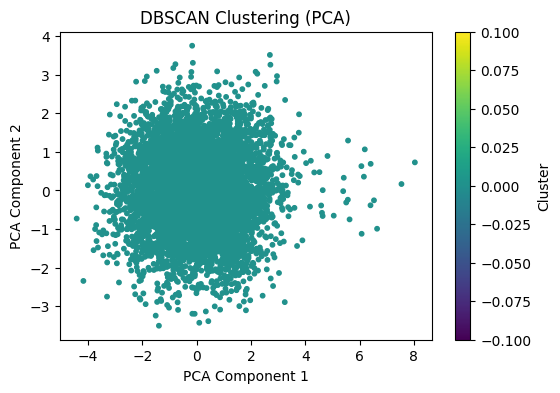

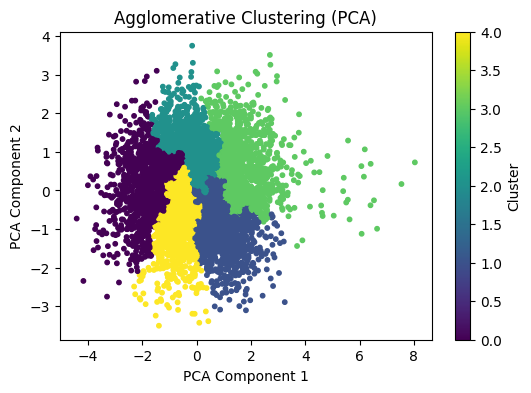

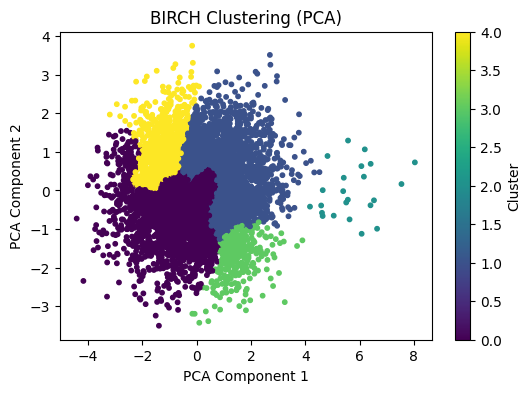

K-Means (PCA):
  Silhouette Score: 0.32
  Adjusted Rand Index: 0.18
DBSCAN (PCA):
  Silhouette Score: nan
  Adjusted Rand Index: 0.00
Agglomerative (PCA):
  Silhouette Score: 0.26
  Adjusted Rand Index: 0.17
BIRCH (PCA):
  Silhouette Score: 0.20
  Adjusted Rand Index: 0.08


In [145]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)
data_pca = pca.fit_transform(data_normalized)
results_pca = {}

for name, model in algorithms.items():
    labels = model.fit_predict(data_pca)
    silhouette = silhouette_score(data_pca, labels) if len(np.unique(labels)) > 1 else np.nan
    ari = adjusted_rand_score(data["Exam_Score"], labels)
    results_pca[name] = {"Silhouette Score": silhouette, "Adjusted Rand Index": ari}

    plt.figure(figsize=(6, 4))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap="viridis", s=10)
    plt.title(f"{name} Clustering (PCA)")
    plt.colorbar(label="Cluster")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

for method, scores in results_pca.items():
    print(f"{method} (PCA):")
    for metric, value in scores.items():
        print(f"  {metric}: {value:.2f}")


## Выводы

In [146]:
all_results = {
    "Naive Approach": naive_results,
    "Normalized Data": normalized_results,
    "PCA Reduced Data": results_pca,
}

df_results = pd.DataFrame()
for approach, results in all_results.items():
    for algorithm, metrics in results.items():
        df_results = pd.concat(
            [
                df_results,
                pd.DataFrame(
                    {
                        "Approach": [approach],
                        "Algorithm": [algorithm],
                        "Silhouette Score": [metrics.get("Silhouette Score", float("nan"))],
                        "Adjusted Rand Index": [metrics.get("Adjusted Rand Index", float("nan"))],
                    }
                ),
            ],
            ignore_index=True,
        )

df_results_sorted = df_results.sort_values(by="Adjusted Rand Index", ascending=False)
df_results_sorted

,Approach,Algorithm,Silhouette Score,Adjusted Rand Index
8,PCA Reduced Data,K-Means,0.317439,0.176971
10,PCA Reduced Data,Agglomerative,0.259209,0.171400
11,PCA Reduced Data,BIRCH,0.203565,0.080742
0,Naive Approach,K-Means,0.189704,0.045603
3,Naive Approach,BIRCH,0.228607,0.037526
2,Naive Approach,Agglomerative,0.223020,0.037354
4,Normalized Data,K-Means,0.039287,0.031601
6,Normalized Data,Agglomerative,0.043829,0.002812
7,Normalized Data,BIRCH,0.041848,0.000036
1,Naive Approach,DBSCAN,NaN,0.000000


Метод понижения размерности PCA даёт значительное улучшение кластеризации.